# Japan Inbound Tourism Analysis
## Introduction
This project analyzes inbound travel to Japan using data provided by Japan Tourism Marketing Co. 
The goal of this project is to gain a comprehensive understanding of Japanese inbound travel patterns to inform insights and decision-making in tourism marketing.

## Questions to Answer
1. What are the top countries of origin for inbound tourists to Japan?
2. How have inbound tourist numbers to Japan from the top 5 countries changed over time?
3. What are the seasonal travel patterns of visitors to Japan throughout the year?
4. What is the overall trend in inbound tourism to Japan over time?
5. How does the USD/JPY exchange rate relate to the number of visitors to Japan?
6. Which countries have shown the highest year-over-year growth in travelers to Japan?

## Import Libraries and Data

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

#load data
inbound_data = pd.ExcelFile("JTM_inbound_20250804eng.xlsx")

## Explore Data

In [82]:
#explore data
inbound_data.sheet_names

['Grand Total', 'Asia', 'Europe', 'Others & Grand Total']

In [83]:
inbound_data = pd.read_excel("JTM_inbound_20250804eng.xlsx", sheet_name="Asia", header=3)
inbound_data.head()

,2025-08-07 00:00:00,Unnamed: 1,Asia Total,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Korea,Unnamed: 8,Unnamed: 9,...,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Hong Kong residents with British National Overseas passport,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,NaN,NaN,Total,Tourist,Business,Others,Short Excursion,Total,Tourist,Business,...,Tourist,Business,Others,Short Excursion,NaN,issues by the former Hong Kong Government,NaN,NaN,NaN,NaN
1,NaN,1996 Jan．,173790,87218,43262,35193,8117,89392,51814,23453,...,811,1022,1364,213,NaN,5749,3502.0,1603.0,292.0,352.0
2,NaN,Feb．,194510,125331,41841,20413,6925,73878,41380,25475,...,633,961,738,143,NaN,15540,13433.0,1393.0,175.0,539.0
3,NaN,Mar．,188862,100407,50467,32344,5644,74250,35576,28047,...,770,1221,1039,154,NaN,10844,8493.0,1747.0,299.0,305.0
4,NaN,Apr．,209786,128832,50035,25580,5339,78579,41980,28338,...,1042,1136,1093,172,NaN,12375,10261.0,1595.0,238.0,281.0


## Clean Data

In [84]:
#rename columns, remove unnecessary rows
inbound_data.rename(columns={'Unnamed: 1': 'YearMonth'}, inplace=True)
inbound_data = inbound_data.loc[:, ~inbound_data.columns.astype(str).str.contains("unnamed|new category|Asia Total", case=False)]
inbound_data = inbound_data.drop(inbound_data.columns[0], axis=1)
inbound_data.head()

,YearMonth,Korea,China,Taiwan,Hong Kong,Thailand,Singapore,Malaysia,Indonesia,Philippines,Vietnam,India,Middle East,Israel,Turkey,Gulf Cooperation Council,Macau,Mongolia,Asia Unclassified,Hong Kong residents with British National Overseas passport
0,NaN,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,issues by the former Hong Kong Government
1,1996 Jan．,89392,21505,33746,7204,3614,2578,2186,2738,5044,NaN,2046,NaN,327,NaN,NaN,NaN,NaN,3410,5749
2,Feb．,73878,14876,61453,18852,4076,4577,3974,3729,4177,NaN,1729,NaN,714,NaN,NaN,NaN,NaN,2475,15540
3,Mar．,74250,21066,53728,13013,5454,4743,3213,2836,4988,NaN,1815,NaN,572,NaN,NaN,NaN,NaN,3184,10844
4,Apr．,78579,18047,64554,14908,8976,4820,4744,3302,5819,NaN,2005,NaN,589,NaN,NaN,NaN,NaN,3443,12375


In [85]:
#organize year and month columns
inbound_data["Year"] = inbound_data["YearMonth"].str.extract(r"(\d+)")
inbound_data["YearMonth"] = inbound_data["YearMonth"].str.replace(r"\d+", "", regex=True).str.strip()
inbound_data.insert(0, "Year", inbound_data.pop("Year"))
inbound_data = inbound_data.iloc[1:].reset_index(drop=True)
inbound_data["Year"] = inbound_data["Year"].ffill()
inbound_data.rename(columns={"YearMonth": "Month"}, inplace=True)
inbound_data.head()

,Year,Month,Korea,China,Taiwan,Hong Kong,Thailand,Singapore,Malaysia,Indonesia,...,Vietnam,India,Middle East,Israel,Turkey,Gulf Cooperation Council,Macau,Mongolia,Asia Unclassified,Hong Kong residents with British National Overseas passport
0,1996,Jan．,89392,21505,33746,7204,3614,2578,2186,2738,...,NaN,2046,NaN,327,NaN,NaN,NaN,NaN,3410,5749
1,1996,Feb．,73878,14876,61453,18852,4076,4577,3974,3729,...,NaN,1729,NaN,714,NaN,NaN,NaN,NaN,2475,15540
2,1996,Mar．,74250,21066,53728,13013,5454,4743,3213,2836,...,NaN,1815,NaN,572,NaN,NaN,NaN,NaN,3184,10844
3,1996,Apr．,78579,18047,64554,14908,8976,4820,4744,3302,...,NaN,2005,NaN,589,NaN,NaN,NaN,NaN,3443,12375
4,1996,May．,81678,20713,62251,11626,5872,5064,4958,3429,...,NaN,2639,NaN,585,NaN,NaN,NaN,NaN,3823,9258


In [86]:
#remove unused columns, replace non-digit with 0
inbound_data = inbound_data.fillna(0)
inbound_data = inbound_data.replace(r'^\s*$', 0, regex=True)
inbound_data = inbound_data[~inbound_data["Month"].astype(str).str.contains(r"\d|TOTAL", regex=True, na=False)]
inbound_data['Month'] = inbound_data['Month'].astype(str)
inbound_data['Month'] = inbound_data['Month'].str.replace('．', '', regex=False).str.strip()
inbound_data.head()

/var/folders/z2/qv1k8dsd1052_yg6pggzn6gr0000gn/T/ipykernel_14030/2521018724.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inbound_data = inbound_data.fillna(0)
/var/folders/z2/qv1k8dsd1052_yg6pggzn6gr0000gn/T/ipykernel_14030/2521018724.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inbound_data = inbound_data.replace(r'^\s*$', 0, regex=True)


,Year,Month,Korea,China,Taiwan,Hong Kong,Thailand,Singapore,Malaysia,Indonesia,...,Vietnam,India,Middle East,Israel,Turkey,Gulf Cooperation Council,Macau,Mongolia,Asia Unclassified,Hong Kong residents with British National Overseas passport
0,1996,Jan,89392,21505,33746,7204,3614,2578,2186,2738,...,0,2046,0,327,0,0,0,0,3410.0,5749
1,1996,Feb,73878,14876,61453,18852,4076,4577,3974,3729,...,0,1729,0,714,0,0,0,0,2475.0,15540
2,1996,Mar,74250,21066,53728,13013,5454,4743,3213,2836,...,0,1815,0,572,0,0,0,0,3184.0,10844
3,1996,Apr,78579,18047,64554,14908,8976,4820,4744,3302,...,0,2005,0,589,0,0,0,0,3443.0,12375
4,1996,May,81678,20713,62251,11626,5872,5064,4958,3429,...,0,2639,0,585,0,0,0,0,3823.0,9258


## Analyse Data
### Q1. What are the top countries of origin for inbound tourists to Japan?

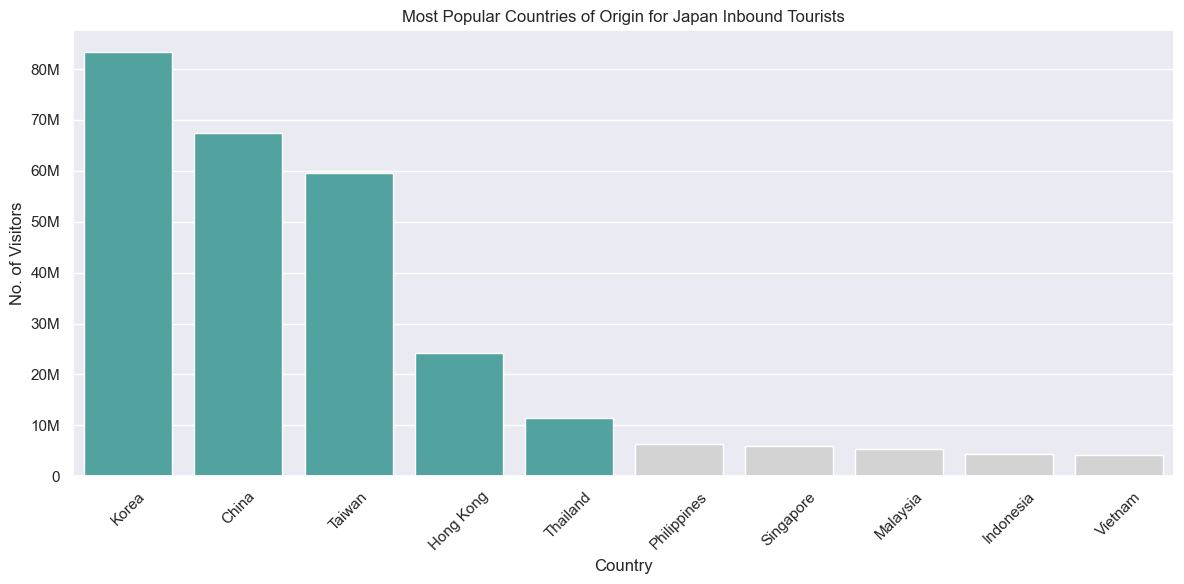

In [93]:
#data prep
visitor_columns = inbound_data.drop(columns=['Year','Month'])
total_visitors_per_country = (
    visitor_columns.sum()
    .head(10)
    .sort_values(ascending=False)
    .reset_index()
)
total_visitors_per_country.columns = ['Country', 'Visitors']

#create plot
sns.set_theme(palette="Dark2")
plt.figure(figsize=(12,6))

colors = ['#44B0AB' if i < 5 else 'lightgrey' for i in range(len(total_visitors_per_country))]

ax = sns.barplot(
    data=total_visitors_per_country,
    x='Country',
    y='Visitors',
    hue='Country',        
    palette=colors,
    legend=False          
)

# format y-axis labels
def format_number(x, pos):
    if x >= 1_000_000:
        return f"{int(x/1_000_000)}M"
    elif x >= 1_000:
        return f"{int(x/1_000)}K"
    else:
        return str(int(x))

ax.yaxis.set_major_formatter(FuncFormatter(format_number))

plt.title('Most Popular Countries of Origin for Japan Inbound Tourists')
plt.ylabel('No. of Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Q2. How have inbound tourist numbers to Japan from the top 5 countries changed over time?

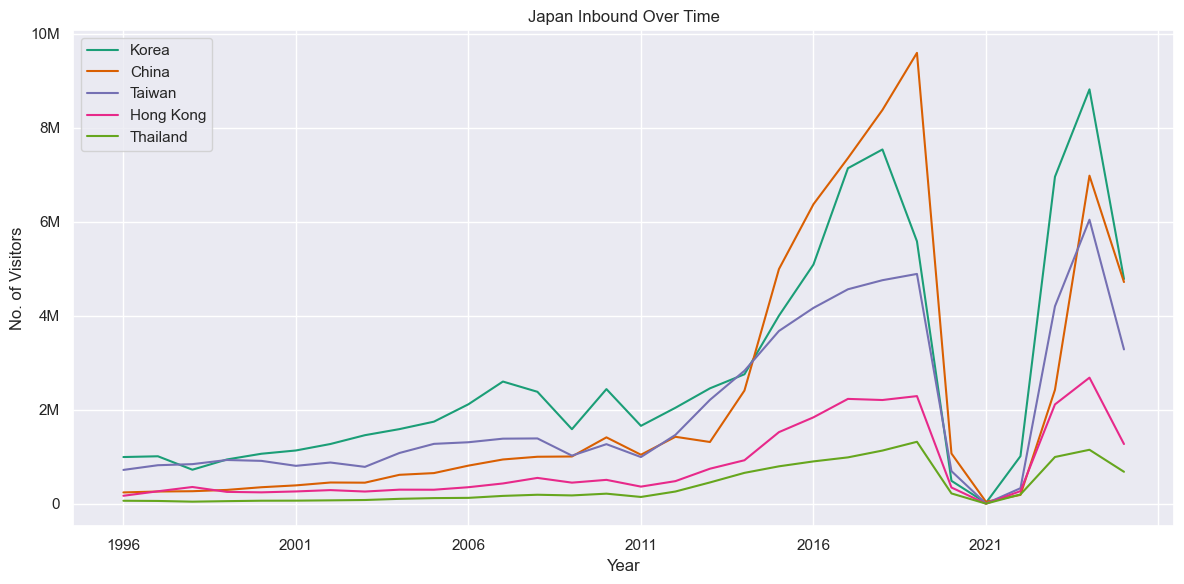

In [88]:
#data prep
df_grouped = inbound_data.groupby("Year").sum()
df_numeric = inbound_data.apply(pd.to_numeric, errors='coerce')
top5_countries = df_numeric.sum().sort_values(ascending=False).head(5).index.tolist()
df_grouped[top5_countries].plot(figsize=(12,6))

#custom y-axis formatter for readibility
def format_number(x, pos):
    if x >= 1_000_000:
        return f"{int(x/1_000_000)}M"
    elif x >= 1_000:
        return f"{int(x/1_000)}K"
    else:
        return str(int(x))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

#create barplot
plt.title("Japan Inbound Over Time")
plt.ylabel("No. of Visitors")
plt.tight_layout()
plt.show()

### Q3. What are the seasonal travel patterns of visitors to Japan throughout the year?

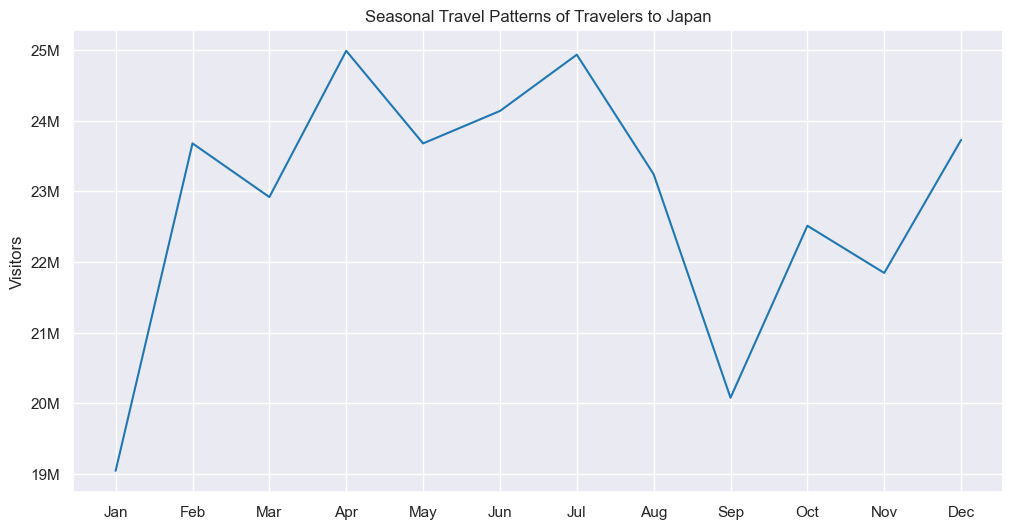

In [94]:
# data prep
months_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
inbound_data['Month'] = pd.Categorical(inbound_data['Month'], categories=months_order, ordered=True)
numeric_cols = inbound_data.columns[2:]

# explicitly set observed=False to keep same behavior and silence warning
inbound_data_month_grouped = inbound_data.groupby('Month', observed=False)[numeric_cols].sum()
inbound_data_month_grouped['Total'] = inbound_data_month_grouped.sum(axis=1)

# create line plot with matplotlib
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(inbound_data_month_grouped.index, inbound_data_month_grouped['Total'], color="tab:blue")

# custom y-axis formatter
def format_number(x, pos):
    if x >= 1_000_000:
        return f"{int(x/1_000_000)}M"
    elif x >= 1_000:
        return f"{int(x/1_000)}K"
    else:
        return str(int(x))
ax.yaxis.set_major_formatter(FuncFormatter(format_number))

# labels and title
ax.set_title("Seasonal Travel Patterns of Travelers to Japan")
ax.set_ylabel("Visitors")

plt.show()


### Q4. What is the overall trend in inbound tourism to Japan over time?

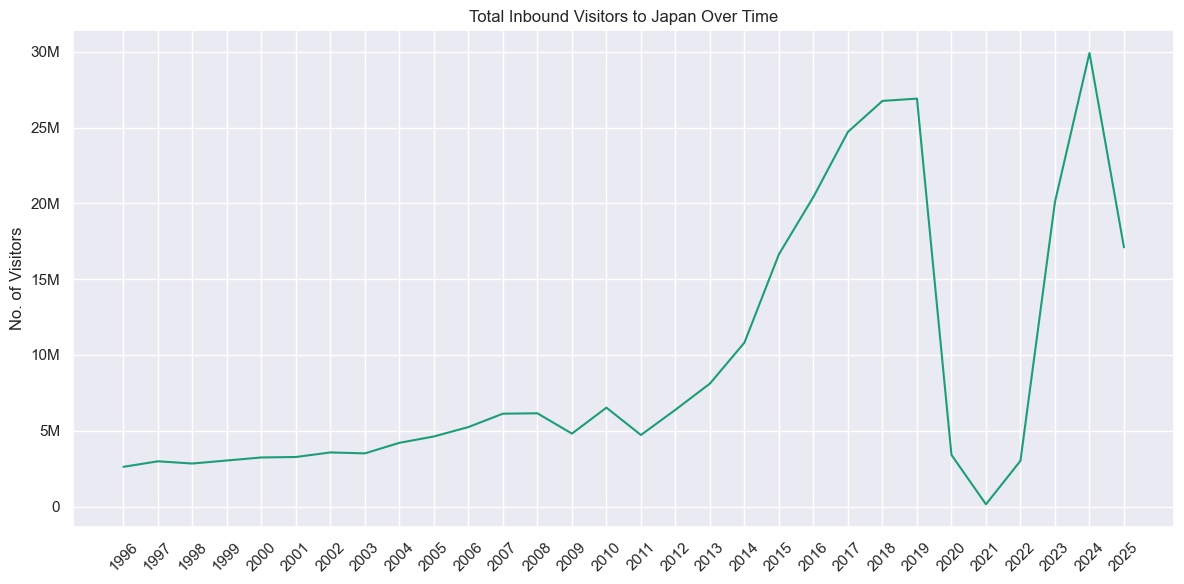

In [90]:
#data prep
df_grouped = inbound_data.groupby("Year").sum(numeric_only=True)
df_grouped['Total_Visitors'] = df_grouped.sum(axis=1)

#create plot
plt.figure(figsize=(12,6))
plt.plot(df_grouped.index, df_grouped['Total_Visitors'])

#custom y-axis formatter for readibility
def format_number(x, pos):
    if x >= 1_000_000:
        return f"{int(x/1_000_000)}M"
    elif x >= 1_000:
        return f"{int(x/1_000)}K"
    else:
        return str(int(x))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

plt.xticks(rotation=45)
plt.title("Total Inbound Visitors to Japan Over Time")
plt.ylabel("No. of Visitors")
plt.tight_layout()
plt.show()

### Q5. How does the USD/JPY exchange rate relate to the number of visitors to Japan?

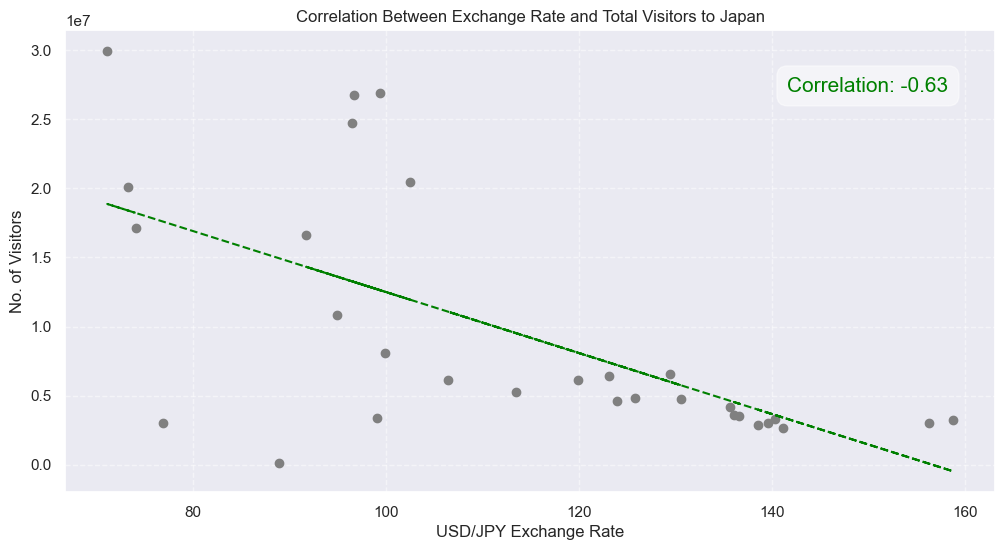

In [91]:
#data prep
corr = np.corrcoef(merged['Total_Visitors'], merged['USDJPY_MonthAvg'])[0,1]
x = merged['USDJPY_MonthAvg']
y = merged['Total_Visitors']
m, b = np.polyfit(x, y, 1)

#create plot
plt.figure(figsize=(12,6))
plt.scatter(x, y, color='grey')
plt.plot(x, m*x + b, color='green', linestyle='--', label='Trend Line')
plt.xlabel("USD/JPY Exchange Rate")
plt.ylabel("No. of Visitors")
plt.title("Correlation Between Exchange Rate and Total Visitors to Japan")
plt.grid(True, linestyle="--", alpha=0.5)
plt.text(
    0.95, 0.9, f"Correlation: {corr:.2f}", 
    transform=plt.gca().transAxes, 
    fontsize=15, 
    verticalalignment='top',
    horizontalalignment='right',
    color='green',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.5)
)
plt.show()

### Q6. Which countries have shown the highest year-over-year growth in travelers to Japan?


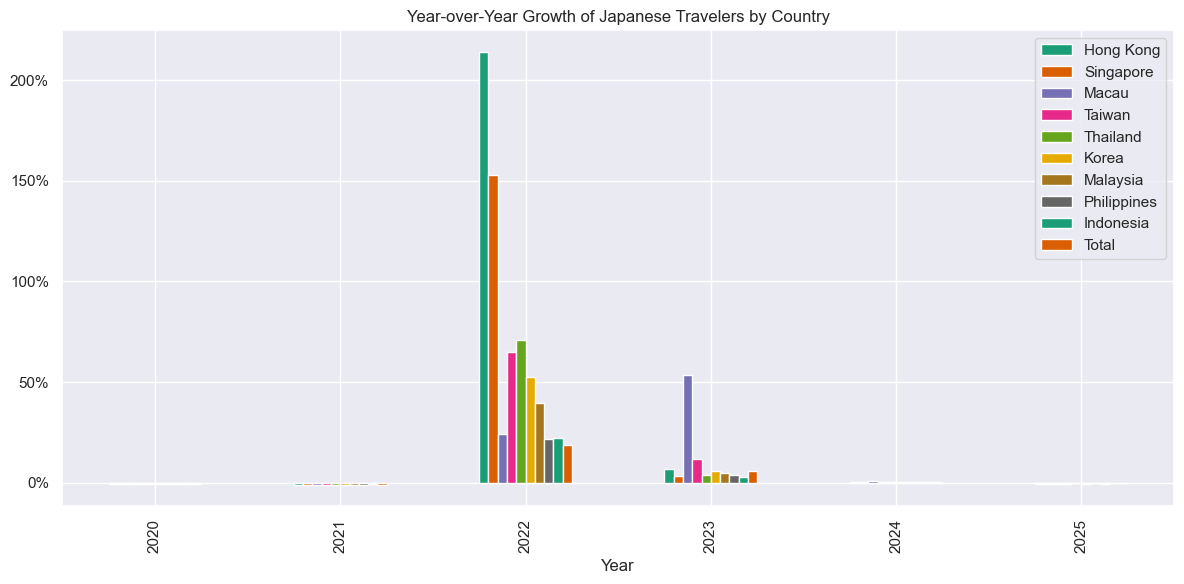

In [92]:
#data prep
numeric_cols = inbound_data.select_dtypes(include='number').columns.tolist()
inbound_data_year_grouped = inbound_data.groupby('Year')[numeric_cols].sum().sort_index()
inbound_data_year_grouped['Total'] = inbound_data_year_grouped.sum(axis=1)
outbound_data_year_grouped = inbound_data_year_grouped.apply(pd.to_numeric, errors='coerce').fillna(0)
df_yoy = inbound_data_year_grouped.pct_change()
df_yoy = df_yoy.round(2)
df_yoy.index = df_yoy.index.astype(int)
inbound_data_year_grouped.index = pd.to_numeric(inbound_data_year_grouped.index, errors='coerce')
df_filtered = df_yoy.loc[2020:2025]
top10_countries = df_filtered.mean().sort_values(ascending=False).head(10).index
df_top10 = df_filtered[top10_countries]

#create plot
ax = df_top10.plot(kind='bar', figsize=(12,6))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))
plt.title("Year-over-Year Growth of Japanese Travelers by Country")
plt.tight_layout()
plt.show()

